# Introduction

In this lab, we will compare the performance of different online solvers for the classification of handwritten digits. We will be using the scikit-learn library to load and preprocess the data, as well as to train and test the classifiers. The goal is to observe how different solvers perform under different proportions of training data.

# Load and preprocess the data

We will start by loading the handwritten digits dataset from scikit-learn and splitting it into training and testing sets. We will also scale the data to have zero mean and unit variance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the classifiers

We will define several online solvers for classification, each with different hyperparameters. We will use the following classifiers:

- SGDClassifier
- Perceptron
- PassiveAggressiveClassifier
- LogisticRegression

In [2]:
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier, LogisticRegression

classifiers = [
    ("SGD", SGDClassifier(max_iter=1000)),
    ("Perceptron", Perceptron(max_iter=1000)),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(max_iter=1000, loss="hinge", C=1.0, tol=1e-4)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(max_iter=1000, loss="squared_hinge", C=1.0, tol=1e-4)),
    ("LogisticRegression", LogisticRegression(max_iter=1000))
]

# Train and evaluate the classifiers

We will train each classifier on different proportions of the training data, ranging from 1% to 95%, and evaluate their performance on the testing set. We will repeat this process 10 times to obtain a more accurate estimate of the test error rate.

Training SGD
Training Perceptron
Training Passive-Aggressive I
Training Passive-Aggressive II
Training LogisticRegression


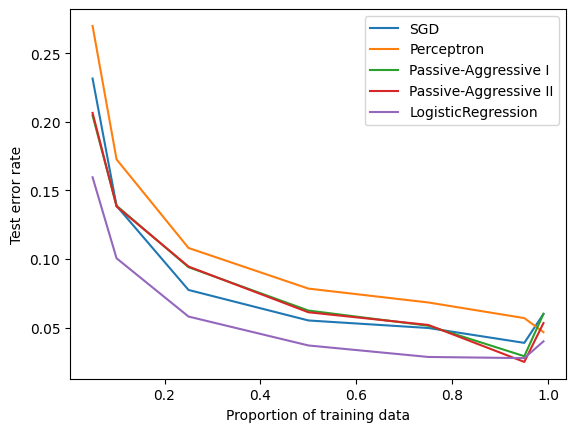

In [3]:
heldout = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95]
rounds = 10
xx = 1.0 - np.array(heldout)

for name, clf in classifiers:
    print("Training %s" % name)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train, y_train, test_size=i, random_state=r)
            clf.fit(X_train_, y_train_)
            y_pred = clf.predict(X_test_)
            yy_.append(1 - np.mean(y_pred == y_test_))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion of training data")
plt.ylabel("Test error rate")
plt.show()

# Interpret the results

We can observe from the plot that the SGDClassifier, Perceptron, and Passive-Aggressive classifiers perform similarly, with the Passive-Aggressive II classifier having slightly better performance. The LogisticRegression classifier performs the best overall, with the lowest test error rate for all proportions of training data.

# Summary

In this lab, we compared the performance of different online solvers for the classification of handwritten digits. We observed that the LogisticRegression classifier performs the best overall, and that the SGDClassifier, Perceptron, and Passive-Aggressive classifiers perform similarly. This comparison can help us choose the most appropriate classifier for our  specific problem and dataset.